***
# <center> Video Game Sales (2013-2016) Exploratory Analysis
### <center> Louis Bailey
***

## Introduction

<b>The Data:</b> This dataset, called Video Game Sales can be found on Kaggle. It contains information on video games with sales greater than 100,000 copies. Columns include

* <u>Rank</u> - Ranking of overall sales

* <u>Name</u> - The games name

* <u>Platform</u> - Platform of the games release (i.e. PC,PS4, etc.)

* <u>Year_of_Release</u> - Year of the game's release

* <u>Genre</u> - Genre of the game

* <u>Publisher</u> - Publisher of the game

* <u>NA_Sales</u> - Sales in North America (in millions)

* <u>EU_Sales</u> - Sales in Europe (in millions)

* <u>JP_Sales</u> - Sales in Japan (in millions)

* <u>Other_Sales</u> - Sales in the rest of the world (in millions)

* <u>Global_Sales</u> - Total worldwide sales.

* <u>User_score</u> - user scores from vgcharts.com

* <u>Rating</u> - Rating of the Game (e.g. E, T, M)

<b>Project Summary:</b> A video game developer is interested in what the market looks like. They want to make a game that is likely to be profitable. The goal will be to analyze this data to find what gamers want, where demands aren't being met, and how these demands vary in different places of the world. 

The data that will be analyzed dates from 2013-2016. Currently this information is out-of-date. For example no one is buying PS3s or Xbox 360s anymore. However, for this project, this data will be treated as if it is up-to-date and relevant.

In [1]:
import pandas as pd
import numpy as np

import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

# <center> > Querying Database <

## connecting to database

In [2]:
conn = sqlite3.connect('video_game_database.db')
c = conn.cursor()

In [3]:
def is_opened(conn):
    try:
        conn.execute("SELECT * FROM sales_and_ratings LIMIT 1")
        return True  
    except sqlite3.ProgrammingError as e:
        print("Connection closed {}".format(e))
        return False
    
is_opened(conn)

True

## selecting desired columns 

In [4]:
df = pd.read_sql_query(
    '''
        SELECT Name, Platform, Year_of_Release, Genre, Publisher, NA_Sales, EU_Sales, 
               JP_Sales, Other_Sales, Global_Sales, User_Score, Rating
        
        FROM sales_and_ratings
        
        WHERE Year_of_Release IS NOT NULL AND Rating IS NOT NULL AND User_Score IS NOT NULL
    ''',
    conn
)

In [5]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,8,E
1,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,8.3,E
2,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,8,E
3,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,8.5,E
4,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,6.6,E


# <center> > Data Prep <

## Clean

In [6]:
print(f"Shape: {df.shape}\n{'-'*40}")
print(f"Missing:\n{df.isna().sum()}\n{'-'*40}")
print(f"Duplicates: {df.duplicated().sum()}")

Shape: (9707, 12)
----------------------------------------
Missing:
Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          2
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
User_Score         0
Rating             0
dtype: int64
----------------------------------------
Duplicates: 0


## Filter Data 2013-2016

In [7]:
df_modern = df[(df.Year_of_Release>=2013) & (df.Year_of_Release!=2020)]
df_modern.shape

(1245, 12)

## Datatypes

In [8]:
df_modern.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
User_Score          object
Rating              object
dtype: object

In [9]:
#change User_Score to float
df_modern.loc[:, 'User_Score']  = pd.to_numeric(df_modern['User_Score'], errors='coerce')

# <center> > Big Picture on Sales <

In [10]:
#
total_sales_platform   = df_modern.groupby('Platform').Global_Sales.sum().sort_values(ascending=False)
total_sales_year       = df_modern.groupby('Year_of_Release').Global_Sales.sum().sort_values(ascending=False)
total_sales_genre      = df_modern.groupby('Genre').Global_Sales.sum().sort_values(ascending=False)
total_sales_rating     = df_modern.groupby('Rating').Global_Sales.sum().sort_values(ascending=False)

#total sales by area
north_amer_sales = round(df.NA_Sales.sum(),1)
europe_sales     = round(df.EU_Sales.sum(),1)
japan_sales      = round(df.JP_Sales.sum(),1)
other_sales      = round(df.Other_Sales.sum(),1)

all_sales = [north_amer_sales,europe_sales,other_sales,japan_sales]

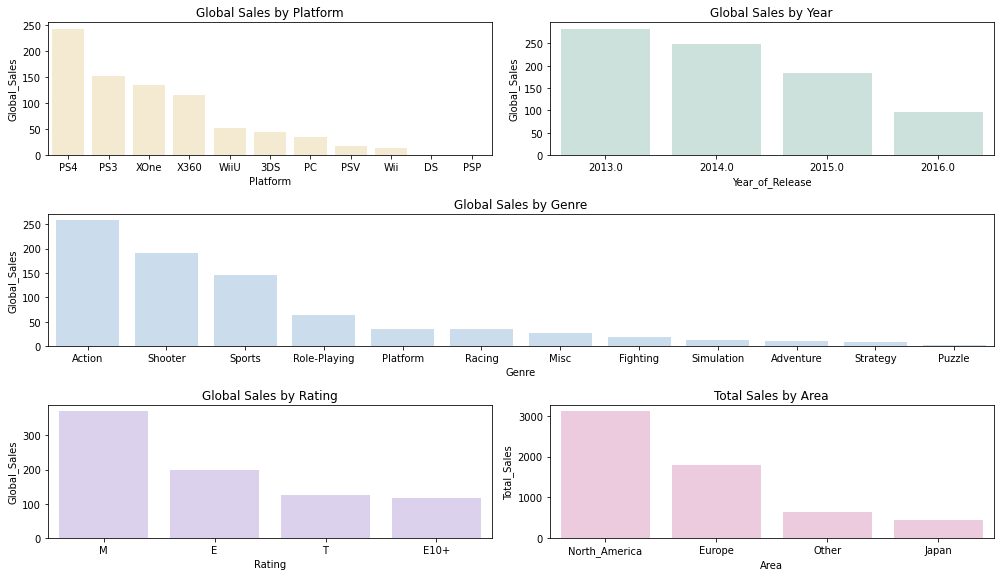

In [11]:
#

plt.figure(figsize=(14,13))

ax1 = plt.subplot2grid((5, 2), (0, 0))  
ax2 = plt.subplot2grid((5, 2), (0, 1))    
ax3 = plt.subplot2grid((5, 2), (1, 0), colspan=2)  
ax4 = plt.subplot2grid((5, 2), (2, 0))  
ax5 = plt.subplot2grid((5, 2), (2, 1)) 

ax1.set_title('Global Sales by Platform')
ax2.set_title('Global Sales by Year')
ax3.set_title('Global Sales by Genre')
ax4.set_title('Global Sales by Rating')
ax5.set_title('Total Sales by Area')

sns.barplot(total_sales_platform, ax=ax1, color='#FAEDCB')
sns.barplot(total_sales_year, ax=ax2, color='#C9E4DE')
sns.barplot(total_sales_genre, ax=ax3, color='#C6DEF1')
sns.barplot(total_sales_rating, ax=ax4, color='#DBCDF0')
sns.barplot(all_sales, ax=ax5, color='#F2C6DE')

new_labels = ['North_America', 'Europe', 'Other', 'Japan']
ax5.set_xticks(range(len(new_labels)))
ax5.set_xticklabels(new_labels)
ax5.set_ylabel('Total_Sales')
ax5.set_xlabel('Area')

plt.tight_layout()
plt.show()

<div style="border: 2px solid #ffb347; padding: 5px;color: 'black'; margin: 10px 0;width:70%;">
  
> Play Station is the best selling platform followed by Xbox and then Wii.

>  Global sales appear to be steadily declining from 2013 to 2016.
    
> Best selling genres appear to be action, shooters, and then sports.
    
> M rated games appear to sell way more than other ratings. 
    
> North America appears to buy about as many games as the rest of the world combined.    
</div>

# <center> > Average User Score by Genre <

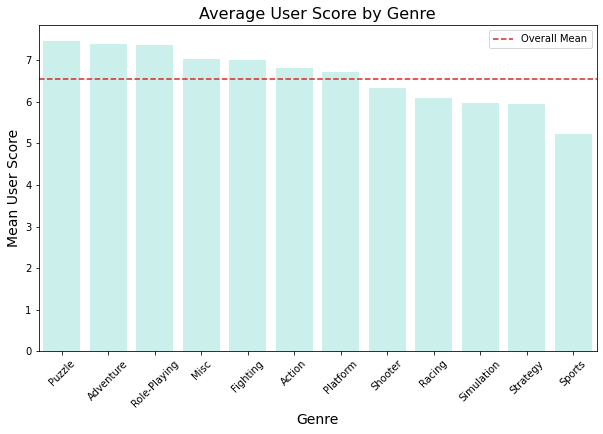

In [12]:
#
plt.figure(figsize=(10,6))

pd.set_option('display.float_format', lambda x: '%.2f' % x)
score_by_genre = df_modern.groupby('Genre').User_Score.mean().sort_values(ascending=False)

sns.barplot(score_by_genre, color='turquoise', alpha=0.3)
plt.axhline(y=6.56, color='tab:red',label='Overall Mean', linestyle='--')
plt.title('Average User Score by Genre', size=16)
plt.ylabel('Mean User Score', size=14)
plt.xlabel('Genre', size=14)
plt.xticks(rotation=45)
plt.legend()

plt.show()

<div style="border: 2px solid #ffb347; padding: 5px;color: 'black'; margin: 10px 0;width:50%;">

> It appears demands are not being met regarding both shooters and sports games. This is noteworthy because these genres are in the top 3 of most bought games.
</div>

# <center>   > Pecent of Sales by Genre and Area < 
### <center> percentages > 0.6%

In [13]:
#
#North America
total_sales = df_modern['NA_Sales'].sum()
percent_sales_genre_area_NA = (df_modern.groupby('Genre').NA_Sales.sum() / total_sales * 100).sort_values(ascending=False)
percent_sales_genre_area_NA = percent_sales_genre_area_NA[percent_sales_genre_area_NA>0.6]

#europe
total_sales = df_modern['EU_Sales'].sum()
percent_sales_genre_area_EU =(df_modern.groupby('Genre').EU_Sales.sum() / total_sales * 100).sort_values(ascending=False)
percent_sales_genre_area_EU = percent_sales_genre_area_EU[percent_sales_genre_area_EU>0.6]

#japan
total_sales = df_modern['JP_Sales'].sum()
percent_sales_genre_area_JP =(df_modern.groupby('Genre').JP_Sales.sum() / total_sales * 100).sort_values(ascending=False)
percent_sales_genre_area_JP = percent_sales_genre_area_JP[percent_sales_genre_area_JP>0.6]

#other
total_sales = df_modern['JP_Sales'].sum()
percent_sales_genre_area_Other =(df_modern.groupby('Genre').Other_Sales.sum() / total_sales * 100).sort_values(ascending=False)
percent_sales_genre_area_Other = percent_sales_genre_area_Other[percent_sales_genre_area_Other>0.6]

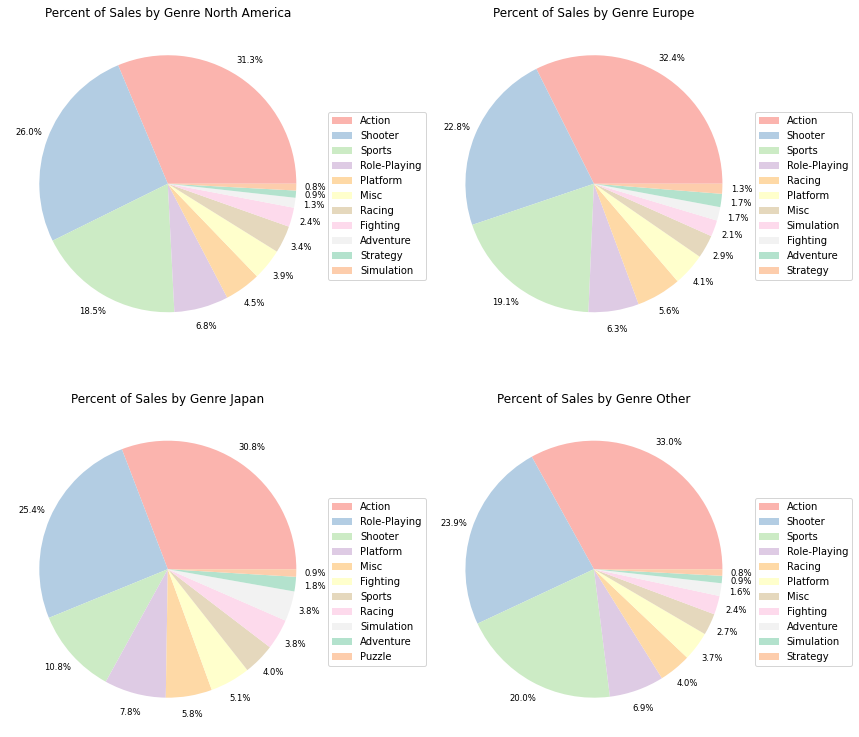

In [14]:
#

colors = ['#fbb4ae', '#b3cde3', '#ccebc5', '#decbe4', '#fed9a6', 
          '#ffffcc', '#e5d8bd', '#fddaec', '#f2f2f2', '#b3e2cd', '#fdcdac']

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(14,13))

ax1.pie(percent_sales_genre_area_NA, autopct='%1.1f%%', pctdistance=1.15,textprops={'fontsize': 8.5},colors=colors)
ax1.legend(labels=percent_sales_genre_area_NA.keys(), loc=(1,.2))
ax1.set_title('Percent of Sales by Genre North America')

ax2.pie(percent_sales_genre_area_EU, autopct='%1.1f%%', pctdistance=1.15,textprops={'fontsize': 8.5},colors=colors)
ax2.legend(labels=percent_sales_genre_area_EU.keys(), loc=(1,.2))
ax2.set_title('Percent of Sales by Genre Europe')

ax3.pie(percent_sales_genre_area_JP, autopct='%1.1f%%', pctdistance=1.15,textprops={'fontsize': 8.5},colors=colors)
ax3.legend(labels=percent_sales_genre_area_JP.keys(), loc=(1,.2))
ax3.set_title('Percent of Sales by Genre Japan')

ax4.pie(percent_sales_genre_area_Other, autopct='%1.1f%%', pctdistance=1.15,textprops={'fontsize': 8.5},colors=colors)
ax4.legend(labels=percent_sales_genre_area_Other.keys(), loc=(1,.2))
ax4.set_title('Percent of Sales by Genre Other')

plt.show()

<div style="border: 2px solid #ffb347; padding: 5px;color: 'black'; margin: 10px 0;width:50%;">

> In all of the areas except Japan, the highest selling genres are action, shooter, and then sports. In Japan they are action, role-playing, and then shooters.
</div>

# <center> > Percent of Sales by Platform and Area <
### <center> Percentages > 0.3%

In [15]:
#
#North America
total_sales = df_modern['NA_Sales'].sum()
percent_sales_area_NA = (df_modern.groupby('Platform').NA_Sales.sum() / total_sales * 100).sort_values(ascending=False)
percent_sales_area_NA = percent_sales_area_NA[percent_sales_area_NA>0.3]

#europe
total_sales = df_modern['EU_Sales'].sum()
percent_sales_area_EU = (df_modern.groupby('Platform').EU_Sales.sum() / total_sales * 100).sort_values(ascending=False)
percent_sales_area_EU = percent_sales_area_EU[percent_sales_area_EU>0.3]

#japan
total_sales = df_modern['JP_Sales'].sum()
percent_sales_area_JP = (df_modern.groupby('Platform').JP_Sales.sum() / total_sales * 100).sort_values(ascending=False)
percent_sales_area_JP = percent_sales_area_JP[percent_sales_area_JP>0.3]

#other
total_sales = df_modern['Other_Sales'].sum()
percent_sales_area_other = (df_modern.groupby('Platform').Other_Sales.sum() / total_sales * 100).sort_values(ascending=False)
percent_sales_area_other = percent_sales_area_other[percent_sales_area_other>0.3]

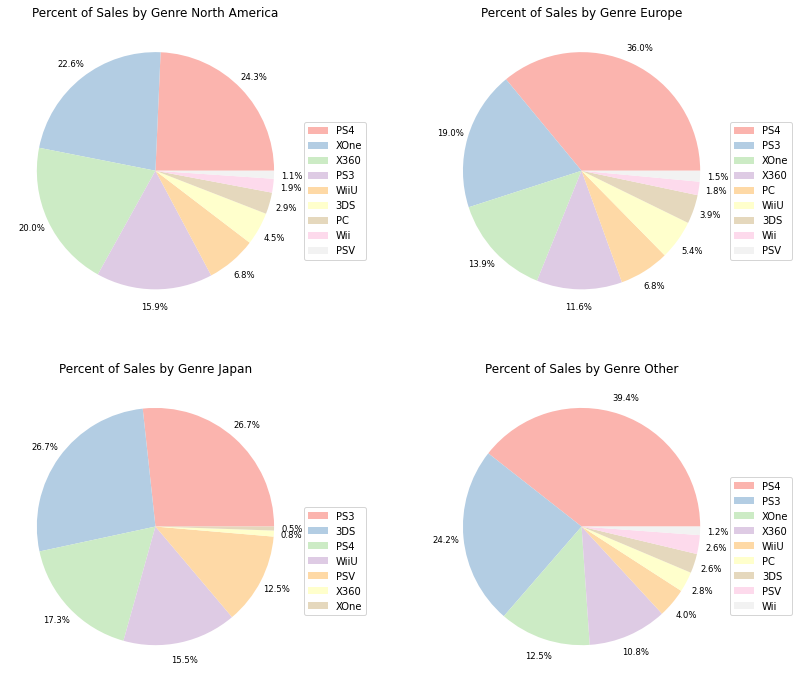

In [16]:
#

colors = ['#fbb4ae', '#b3cde3', '#ccebc5', '#decbe4', '#fed9a6', 
          '#ffffcc', '#e5d8bd', '#fddaec', '#f2f2f2', '#b3e2cd', '#fdcdac']

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(14,12))

ax1.pie(percent_sales_area_NA, autopct='%1.1f%%', pctdistance=1.15,textprops={'fontsize': 8.5}, colors=colors)
ax1.legend(labels=percent_sales_area_NA.keys(), loc=(1,.2))
ax1.set_title('Percent of Sales by Genre North America')

ax2.pie(percent_sales_area_EU, autopct='%1.1f%%', pctdistance=1.15,textprops={'fontsize': 8.5}, colors=colors)
ax2.legend(labels=percent_sales_area_EU.keys(), loc=(1,.2))
ax2.set_title('Percent of Sales by Genre Europe')

ax3.pie(percent_sales_area_JP, autopct='%1.1f%%', pctdistance=1.15,textprops={'fontsize': 8.5}, colors=colors)
ax3.legend(labels=percent_sales_area_JP.keys(), loc=(1,.2))
ax3.set_title('Percent of Sales by Genre Japan')

ax4.pie(percent_sales_area_other, autopct='%1.1f%%', pctdistance=1.15,textprops={'fontsize': 8.5}, colors=colors)
ax4.legend(labels=percent_sales_area_other.keys(), loc=(1,.2))
ax4.set_title('Percent of Sales by Genre Other')

plt.show()

<div style="border: 2px solid #ffb347; padding: 10px;color: 'black'; margin: 10px 0;width:50%;">

> In Europe and Other, most sales are for PS4, PS3, Xbox One, and then Xbox 360.

> In North America, most of the sales are for PS4, Xbox One, Xbox 360, and then PS3.
    
> In Japan, most of the sales are for PS3, 3DS, PS4, and then WiiU. 
</div>

# <center> > Global Sales by Genre and Rating <

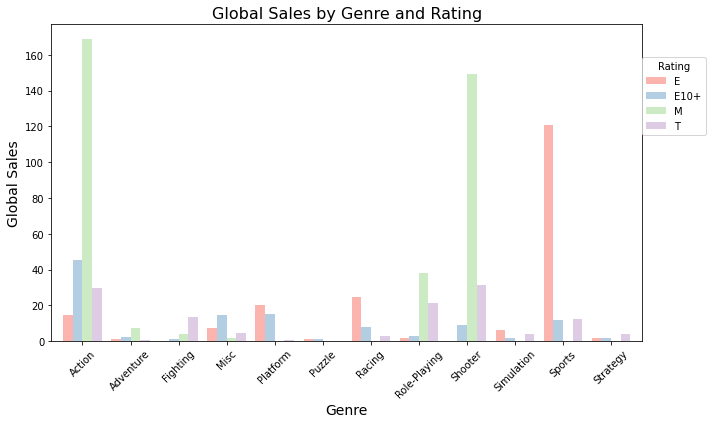

In [17]:
#
sales_rating_genre = df_modern.groupby(['Genre','Rating']).Global_Sales.sum()

sales_rating_genre_unstacked = sales_rating_genre.unstack()

fig, ax = plt.subplots(figsize=(10,6))
sales_rating_genre_unstacked.plot(kind='bar', ax=ax, width=0.8, color=colors[:len(sales_rating_genre_unstacked.columns)])


ax.set_xlabel('Genre', fontsize=14)
ax.set_ylabel('Global Sales', fontsize=14)
ax.set_title('Global Sales by Genre and Rating', size=16)
ax.legend(title='Rating', loc=(1,.65))

plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

<div style="border: 2px solid #ffb347; padding: 10px;color: 'black'; margin: 10px 0;width:50%;">

> For action the highest selling rating is M.

> For shooters the highest selling rating is M.
    
> For sports the highest selling reting is E.
    
> For role-playing the highest selling rating is M.
    
> For platform the highest selling rating is E.
</div>

## Closing Connection to Database

In [18]:
conn.close()
is_opened_status = is_opened(conn)
print("Is the connection open after closing? ", is_opened_status)

Connection closed Cannot operate on a closed database.
Is the connection open after closing?  False


# <center> > Conclusion <

* My conclusion from analyzing this data is that making a shooter or sports game would be a good idea. Shooters and sports games are the 2nd and 3rd most bought globally, and from the mean user scores it appears that demands are not being met for these genres. 
$$$$
* These genres are also the the 2nd and third most bought in every area in this dataset except for Japan (where shooters are 3rd and sports are 7th). 
$$$$
* The game should definitely be made available for both Xbox and PlayStation as these are the most popular platforms (except for Japan where the most popular are Playstation, 3DS, and Wii). 
$$$$
* If it is a shooter it should be rated M, and if it is a sports game it should be rated E as this is what most people buy for these genres. 